# Problem Definition

This is my first notebook solution for a competition in data science and machine learning. Here I will try to predict the survival rate of Titanic passengers. 

The problem definition can be accessed here: https://www.kaggle.com/c/titanic

As a first attempt on a data science problem, my solution is going to follow the guidelines and steps suggested here: https://www.kaggle.com/startupsci/titanic/titanic-data-science-solutions/notebook

It is important to emphasize although having a guideline to follow, all operations were made here authentically

The steps of this prediction and solution are:
- I am going to load the data
- I am going to make some ad hoc and exploratorial analysis
- I am going to try to find some correlations and try to make some assumptions using the analisys from the previous step
- To make assumptions and have insights about the data, i am going to plot information in graph and take some information from statistics
- After that i am going to make the feature selection and data cleaning, remove some useless features and try to create others or maybe combine features
- After having made all feature selection and data cleaning i am going to use some ML algorithms to predict the data
- I am going to rank the results of the models and use the best to use in the final solution

In [1]:
# math and data manipulation
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning models that i am going to use 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Loading Data

I am going to use pandas to read the csv and manipulate it

In [2]:
#loading traning csv
training_df = pd.read_csv('../../datasets/titanic/train.csv') 
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Undestanding Data

To analyze data, first i am going to visualize some of the characteriscts to the data frames

In [3]:
test_df = pd.read_csv('../../datasets/titanic/test.csv') 
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
training_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
test_df.columns

Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

# Dataset Observations

 - Categorical Features: Survived, Sex and Embarked
 - Ordinal Features: Pclass
 - Continuous/Discrete Features: Age, SibSp, Parch, Fare
 
 Some features contain missing values (Cabin, Age, Embarked) both in training or test dataset

In [6]:
# data types in data frames
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In Training Dataset we have:
- Total samples are 891 or 40% of the actual number of passengers on board the Titanic.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Fares varied significantly.
- Few elderly passengers.

In [8]:
training_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- There is no repeated Names
- 65% male .
- Some passengers may have shared a cabin.
- Embarked takes three possible values. S port used by most passengers

In [9]:
# describing only not numeric features using include=['O']
training_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Rosenbaum, Miss. Edith Louise",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# Notes 1


- PassengerId, Ticket, Cabin and Name are not related with the survival
- Some features need to be completed because there is some null values (Age, Embarked) 
- We can create feature from others:
    - Name can be used to create a title feature 
    - SibSp and Parch can be used to create a family features
    - We can use brands for Age and Fare
- It may helps in the analysis. 

## Analyze Individual Features

In the next analysis we will make some pivoting in some features to infer correlation with survival

In [12]:
# using only Pclass and Survived, group by Pclass, calculate the mean and sort in descending order
training_df[['Pclass', 'Survived']].groupby(['Pclass'], \
        as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Notice that as higher was the class of the passenger more chance of surviving. 

In [13]:
training_df[['Sex', 'Survived']].groupby(['Sex'], \
        as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Most of the women survived and only few men survived

In [14]:
training_df[['SibSp', 'Survived']].groupby(['SibSp'], \
        as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


There is no correlation in the feature SibSp with the survival rate

In [15]:
training_df[['Parch', 'Survived']].groupby(['Parch'], \
        as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


There is no correlation in the feature Parch with the survival rate

## Plotting data

Now i am going to plot some informations to have a better undestanding and have better assumptions from the data. To have a good assumption about age, is it better to plot in graph how age and survival are related in the data. 


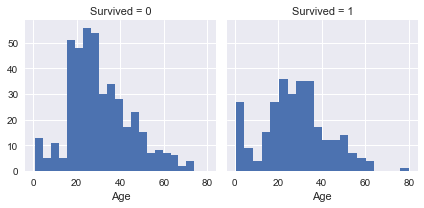

In [16]:
#histogram by age and survival
g = sns.FacetGrid(training_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- Most of the children (Age < 5) survived
- The oldests survived (Age = 80)
- Most of young age did not survived (Age between 20 and 40)
- Most of the people was between 20 and 50 of age

To have more detailed information about age, i am going to plot how age and survival are related with pclass

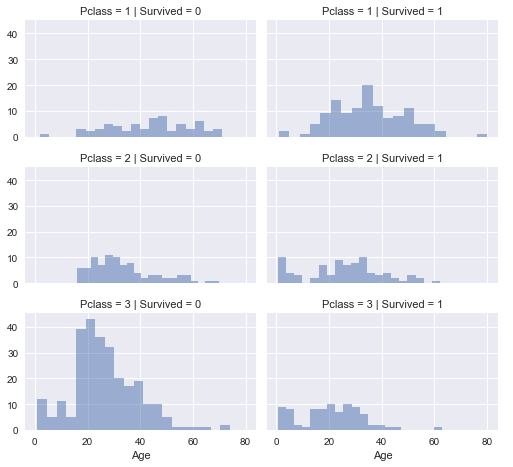

In [17]:
#histogram by age and survival divided by Pclass values
grid = sns.FacetGrid(training_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

You can see observing these plots that in Pclass 1 no matter age, the survival rate was high
In the other hand the opposite happens with Pclass 3

Now, i am going to find some relationship between Embarked, and survival divided by sex and fare

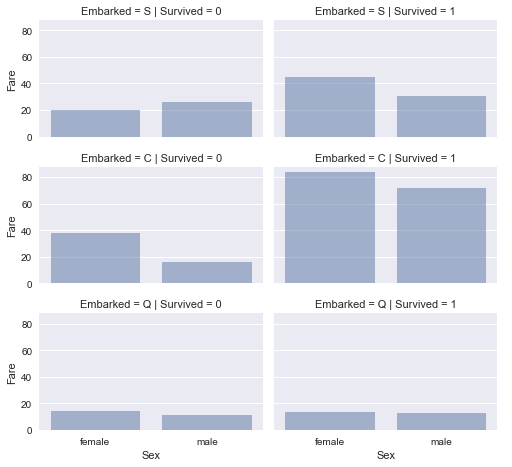

In [18]:
grid = sns.FacetGrid(training_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

You can see that the rate of survival in Embarked C both for men and women was high, the opposite is true for Embarked Q

In [19]:
# Remove useless features
training_df = training_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

## Creating new Features

- Use name to create new feature 'Title'

From information from the guidelines I know that there are a list of possible titles in the data, i am going to use it to create the new feature

In [20]:
#creating feature Title using Name

def find_title(name):
    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']
    for title in title_list:
        if name.find(title) != -1:
            return title
        
    return np.nan

training_df['Title']=training_df['Name'].map(lambda x: find_title(x))
test_df['Title']=test_df['Name'].map(lambda x: find_title(x))

In [21]:
# lets see the new feature
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


For a better undestanding and to make the feature more clean I can normalize some titles and make just some few possible titles in the data. 

In [22]:
#Replacing and making the new feature more simple with few titles

# titles from rare class
training_df['Title'] = training_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# normalizing titles
training_df['Title'] = training_df['Title'].replace('Mlle', 'Miss')
training_df['Title'] = training_df['Title'].replace('Ms', 'Miss')
training_df['Title'] = training_df['Title'].replace('Mme', 'Mrs')


test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')



In [23]:
training_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs


In [24]:
# Remove useless features
training_df = training_df.drop(['Name', 'PassengerId'], axis=1)
# PassengerId is important in test_df for the final answer
test_df = test_df.drop(['Name'], axis=1)

In [25]:
# survived rate divided by title
training_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.703297
2,Mr,0.158301
3,Mrs,0.792308
4,Rare,0.285714


Notice the rate of survival by Title, now we have a new feature to use in our prediction

## Converting Categorical Features

To make the models predict better we can transform the categorical data in numerical data let's do it for features Title and Sex

In [26]:
training_df['Title'] = training_df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
test_df['Title'] = test_df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
training_df['Sex'] = training_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [27]:
# For passenger with no title we will set a standard value
training_df['Title'] = training_df['Title'].fillna(0)
test_df['Title'] = test_df['Title'].fillna(0)

In [28]:
training_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## Handling missing values for feature Age

Here i am going to handling missing values for age like this :

More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...


The suggestion for using this is in the guideline i am following

In [29]:
#create an empty array of 0
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

For each combination of Age and Pclass we are going to find the median Age and use this information to fill the null values for Age for Passenger from that Pclass

In [30]:
for dataset in [training_df, test_df]:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

training_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Now i am going to divide the Age values in 5 brands, then i am going to replace values in this brands with simples values to represent the brand and not the specific Age

In [31]:
training_df['AgeBand'] = pd.cut(training_df['Age'], 5)
training_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


In [32]:
training_df.loc[ training_df['Age'] <= 16, 'Age'] = 0
training_df.loc[(training_df['Age'] > 16) & (training_df['Age'] <= 32), 'Age'] = 1
training_df.loc[(training_df['Age'] > 32) & (training_df['Age'] <= 48), 'Age'] = 2
training_df.loc[(training_df['Age'] > 48) & (training_df['Age'] <= 64), 'Age'] = 3
training_df.loc[ training_df['Age'] > 64, 'Age'] = 4

test_df.loc[ test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[ test_df['Age'] > 64, 'Age'] = 4

training_df.head(20)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"
5,0,3,0,1,0,0,8.4583,Q,1,"(16, 32]"
6,0,1,0,3,0,0,51.8625,S,1,"(48, 64]"
7,0,3,0,0,3,1,21.0750,S,4,"(-0.08, 16]"
8,1,3,1,1,0,2,11.1333,S,3,"(16, 32]"
9,1,2,1,0,1,0,30.0708,C,3,"(-0.08, 16]"


In [33]:
#remove useless feature
training_df = training_df.drop(['AgeBand'], axis=1)

## Combining Features SibSp and Parch to create a family feature

- Combine SibSp with Parch to generate a new Feature FamilySize
- Create new Feature isAlone to have new feature to help the model

In [34]:
# + 1 is to consider the person it self
training_df['FamilySize'] = training_df['SibSp'] + training_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + training_df['Parch']

training_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [35]:
training_df['IsAlone'] = 0
training_df.loc[training_df['FamilySize'] == 1,'IsAlone'] = 1

test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1,'IsAlone'] = 1


training_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [36]:
#droping useless features
training_df = training_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)
training_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,S,1,2,0
1,1,1,1,2,71.2833,C,3,2,0
2,1,3,1,1,7.9250,S,2,1,1
3,1,1,1,2,53.1000,S,3,2,0
4,0,3,0,2,8.0500,S,1,1,1


## Handling missing values for Embaked
- Fill null values with most common value

In [37]:
freq_port = training_df.Embarked.dropna().mode()
freq_port = freq_port[0]

In [38]:
training_df['Embarked'] = training_df.Embarked.fillna(freq_port)
test_df['Embarked'] = test_df.Embarked.fillna(freq_port)

training_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [39]:
#mapping categorical feature to numerical
training_df['Embarked'] = training_df['Embarked'].map({'S':0, 'C':1, 'Q':3}).astype(int)

test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'C':1, 'Q':3}).astype(int)


training_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,0,1,2,0
1,1,1,1,2,71.2833,1,3,2,0
2,1,3,1,1,7.9250,0,2,1,1
3,1,1,1,2,53.1000,0,3,2,0
4,0,3,0,2,8.0500,0,1,1,1


## Handling feature Fare
- Fill missing values with the median value
- Create Bands like we did in feature Age

In [40]:
# dividing the fare in 4 bands
training_df['FareBand'] = pd.qcut(training_df['Fare'], 4)
training_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [41]:
# like in Age , replace values for band value to a better model fitting
training_df.loc[ training_df['Fare'] <= 7.91, 'Fare'] = 0
training_df.loc[(training_df['Fare'] > 7.91) & (training_df['Fare'] <= 14.454), 'Fare'] = 1
training_df.loc[(training_df['Fare'] > 14.454) & (training_df['Fare'] <= 31), 'Fare'] = 2
training_df.loc[ training_df['Fare'] > 31, 'Fare'] = 3

test_df.loc[ test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare'] = 2
test_df.loc[ test_df['Fare'] > 31, 'Fare'] = 3


training_df.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,FareBand
0,0,3,0,1,0.0,0,1,2,0,"[0, 7.91]"
1,1,1,1,2,3.0,1,3,2,0,"(31, 512.329]"
2,1,3,1,1,1.0,0,2,1,1,"(7.91, 14.454]"
3,1,1,1,2,3.0,0,3,2,0,"(31, 512.329]"
4,0,3,0,2,1.0,0,1,1,1,"(7.91, 14.454]"
5,0,3,0,1,1.0,3,1,1,1,"(7.91, 14.454]"
6,0,1,0,3,3.0,0,1,1,1,"(31, 512.329]"
7,0,3,0,0,2.0,0,4,5,0,"(14.454, 31]"
8,1,3,1,1,1.0,0,3,3,0,"(7.91, 14.454]"
9,1,2,1,0,2.0,1,3,2,0,"(14.454, 31]"


In [42]:
# removing useless feature
training_df = training_df.drop(['FareBand'], axis=1)

## Time to make the prediction and solve the problem

After understanding the data, make feature selection and cleaned up the data we can now use the ML models to predict Survival and solve the problem

Following the guideline i am going to use a list of ML predictiors: 
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

After predicting with these models i am going to rank the results and choose the best to use in my final solution

In [43]:
# organize the datasets to submit to models
training_features = training_df.drop("Survived", axis=1)
training_predict = training_df["Survived"]
test_features  = test_df.drop("PassengerId", axis=1).copy()
training_features.shape, training_predict.shape, test_features.shape

((891, 8), (891,), (418, 8))

In [51]:
test_features['Fare'] = test_features['Fare'].fillna(0)
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null int64
Title         418 non-null int64
FamilySize    418 non-null float64
IsAlone       418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


- Logistic Regression

In [60]:
training_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,0.0,0,1,2,0
1,1,1,1,2,3.0,1,3,2,0
2,1,3,1,1,1.0,0,2,1,1
3,1,1,1,2,3.0,0,3,2,0
4,0,3,0,2,1.0,0,1,1,1


In [66]:
logistic_regression = LogisticRegression()
logistic_regression.fit(training_features, training_predict)
test_predict = logistic_regression.predict(test_features)
#accuracy in the training set. It is calculated to have a better undestanding how the model fit in the data. 
accuracy_logistic_regression = logistic_regression.score(training_features, training_predict)
accuracy_logistic_regression, test_predict

(0.8125701459034792,
 array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,

- Support Vector Machine

In [67]:
svc = SVC()
svc.fit(training_features, training_predict)
test_predict = svc.predict(test_features)
accuracy_svc = svc.score(training_features, training_predict)
accuracy_svc, test_predict

(0.83277216610549942,
 array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1